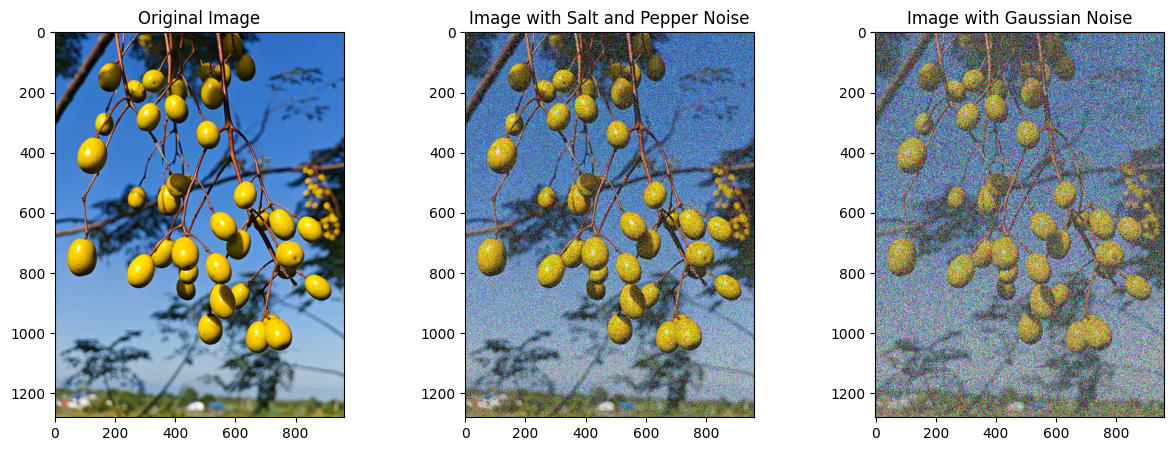

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, util, img_as_float
from skimage.util import random_noise

def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)

    # Convert image to integer type
    noisy_image = util.img_as_ubyte(noisy_image)

    # Add salt noise
    salt_coords = np.random.rand(*image.shape) < salt_prob
    noisy_image[salt_coords] = 255

    # Add pepper noise
    pepper_coords = np.random.rand(*image.shape) < pepper_prob
    noisy_image[pepper_coords] = 0

    return noisy_image

def add_gaussian_noise(image, sigma):
    # Convert image to float type
    image_float = img_as_float(image)

    # Add Gaussian noise
    noisy_image = random_noise(image_float, mode='gaussian', seed=None, clip=True, var=sigma**2)

    # Convert back to uint8 for visualization
    noisy_image = util.img_as_ubyte(noisy_image)

    return noisy_image

# Example usage
# image_path = 'meghalaya.jpg'
# original_image = io.imread(image_path)

# Parameters for salt-and-pepper noise
salt_probability = 0.15  # Probability of adding salt noise to each pixel
pepper_probability = 0.15  # Probability of adding pepper noise to each pixel

# Add salt-and-pepper noise
noisy_image1_photo = add_salt_and_pepper_noise(original_image, salt_probability, pepper_probability)

# Save the first noisy image
output_path1 = 'photography_new_club_salt_pepper_noise.jpg'
io.imsave(output_path1, noisy_image1)

# Parameters for Gaussian noise
gaussian_sigma = 0.8  # Standard deviation of the Gaussian noise

# Add Gaussian noise to the first noisy image
noisy_image2_photo = add_gaussian_noise(original_image, gaussian_sigma)

# Save the second noisy image
output_path2 = 'photography_new_club_gaussian_noise.jpg'
io.imsave(output_path2, noisy_image2_photo)

# Plot the original and noisy images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image1_photo, cmap='gray')
plt.title('Image with Salt and Pepper Noise')

plt.subplot(1, 3, 3)
plt.imshow(noisy_image2_photo, cmap='gray')
plt.title('Image with Gaussian Noise')

plt.show()

image_path = 'photography_club.jpg'
original_image = io.imread(image_path)


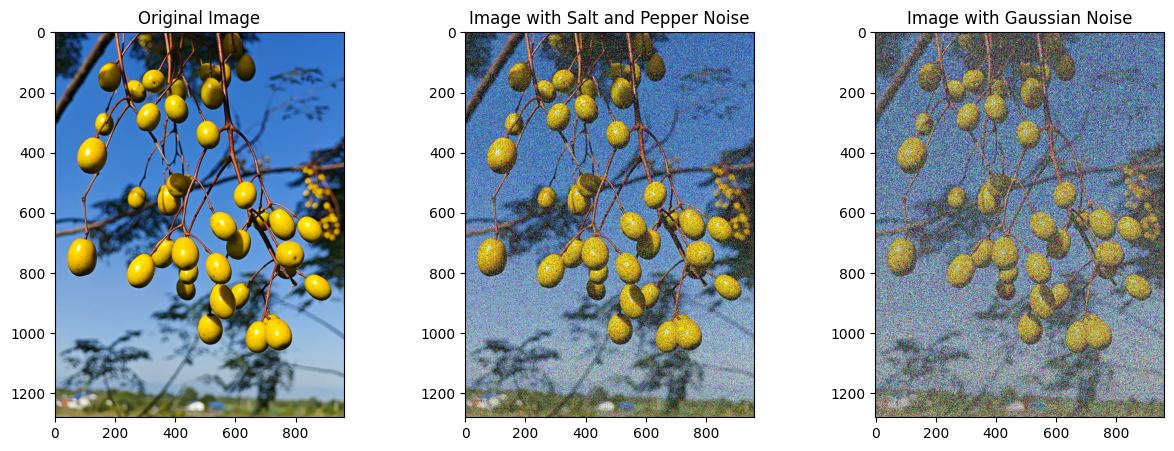

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, util, img_as_float
from skimage.util import random_noise

def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)

    # Convert image to integer type
    noisy_image = util.img_as_ubyte(noisy_image)

    # Add salt noise
    salt_coords = np.random.rand(*image.shape) < salt_prob
    noisy_image[salt_coords] = 255

    # Add pepper noise
    pepper_coords = np.random.rand(*image.shape) < pepper_prob
    noisy_image[pepper_coords] = 0

    return noisy_image

def add_gaussian_noise(image, sigma):
    # Convert image to float type
    image_float = img_as_float(image)

    # Add Gaussian noise
    noisy_image = random_noise(image_float, mode='gaussian', seed=None, clip=True, var=sigma**2)

    # Convert back to uint8 for visualization
    noisy_image = util.img_as_ubyte(noisy_image)

    return noisy_image

# Example usage
# image_path = 'meghalaya.jpg'
# original_image = io.imread(image_path)

# Parameters for salt-and-pepper noise
salt_probability = 0.15  # Probability of adding salt noise to each pixel
pepper_probability = 0.15  # Probability of adding pepper noise to each pixel

# Add salt-and-pepper noise
noisy_image1_photo = add_salt_and_pepper_noise(original_image, salt_probability, pepper_probability)

# Save the first noisy image
output_path1 = 'photography_1_new_club_salt_pepper_noise.jpg'
io.imsave(output_path1, noisy_image1_photo)

# Parameters for Gaussian noise
gaussian_sigma = 0.8  # Standard deviation of the Gaussian noise

# Add Gaussian noise to the first noisy image
noisy_image2_photo = add_gaussian_noise(original_image, gaussian_sigma)

# Save the second noisy image
output_path2 = 'photography_new_club_gaussian_noise.jpg'
io.imsave(output_path2, noisy_image2_photo)

# Plot the original and noisy images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image1_photo, cmap='gray')
plt.title('Image with Salt and Pepper Noise')

plt.subplot(1, 3, 3)
plt.imshow(noisy_image2_photo, cmap='gray')
plt.title('Image with Gaussian Noise')

plt.show()

image_path = 'photography_club.jpg'
original_image = io.imread(image_path)


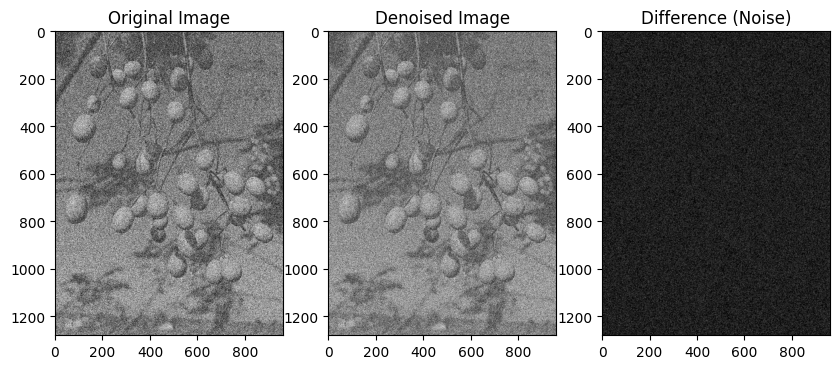

MSE: 0.00
PSNR: 31.49 dB


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from skimage import io, color, metrics
from sklearn.metrics import mean_squared_error

def image_denoising(image_array, wavelet='db4', level=3, mode='hard'):
    # Convert the image to grayscale
    gray_image = color.rgb2gray(image_array)

    # Perform 2D wavelet transform
    coeffs2 = pywt.dwt2(gray_image, wavelet)

    # Set a threshold for denoising
    threshold = 0.1  # Adjust this value based on the noise level in your image

    # Threshold the coefficients
    coeffs2 = tuple(map(lambda x: pywt.threshold(x, threshold, mode=mode), coeffs2))

    # Perform the inverse wavelet transform
    denoised_image = pywt.idwt2(coeffs2, wavelet)

    # Plot the original and denoised images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(denoised_image, cmap='gray')
    plt.title('Denoised Image')
    
    plt.subplot(1, 3, 3)    
    plt.imshow(np.abs(gray_image - denoised_image), cmap='gray')
    plt.title('Difference (Noise)')

    plt.show()

    # Calculate MSE
    mse_value = mean_squared_error(gray_image, denoised_image)
    print(f"MSE: {mse_value:.2f}")

    # Calculate PSNR
    psnr_value = metrics.peak_signal_noise_ratio(gray_image, denoised_image)
    print(f"PSNR: {psnr_value:.2f} dB")

# Example usage with an image array
image_path = 'photography_new_club_gaussian_noise.jpg'
original_image = io.imread(image_path)
image_denoising(original_image, wavelet='db4', level=3, mode='hard')


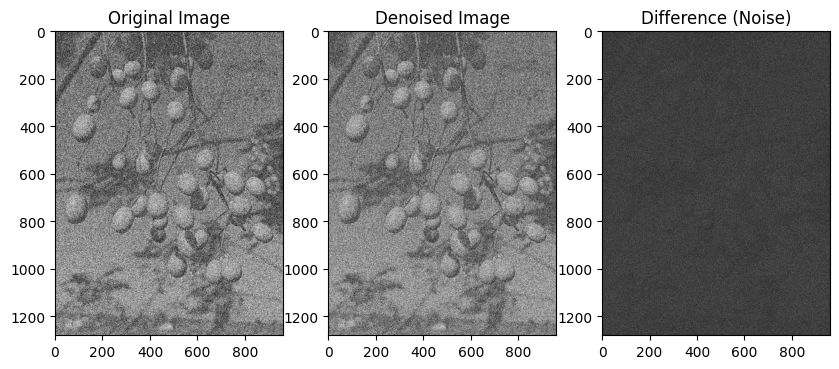

MSE: 0.01
PSNR: 20.68 dB


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from skimage import io, color, metrics
from sklearn.metrics import mean_squared_error

def image_denoising(image_array, wavelet='db4', level=3, mode='soft'):
    # Convert the image to grayscale
    gray_image = color.rgb2gray(image_array)

    # Perform 2D wavelet transform
    coeffs2 = pywt.dwt2(gray_image, wavelet)

    # Set a threshold for denoising
    threshold = 0.1  # Adjust this value based on the noise level in your image

    # Threshold the coefficients
    coeffs2 = tuple(map(lambda x: pywt.threshold(x, threshold, mode=mode), coeffs2))

    # Perform the inverse wavelet transform
    denoised_image = pywt.idwt2(coeffs2, wavelet)

    # Plot the original and denoised images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(denoised_image, cmap='gray')
    plt.title('Denoised Image')
    
    plt.subplot(1, 3, 3)    
    plt.imshow(np.abs(gray_image - denoised_image), cmap='gray')
    plt.title('Difference (Noise)')

    plt.show()

    # Calculate MSE
    mse_value = mean_squared_error(gray_image, denoised_image)
    print(f"MSE: {mse_value:.2f}")

    # Calculate PSNR
    psnr_value = metrics.peak_signal_noise_ratio(gray_image, denoised_image)
    print(f"PSNR: {psnr_value:.2f} dB")

# Example usage with an image array
image_path = 'photography_new_club_gaussian_noise.jpg'
original_image = io.imread(image_path)
image_denoising(original_image, wavelet='db4', level=4, mode='soft')


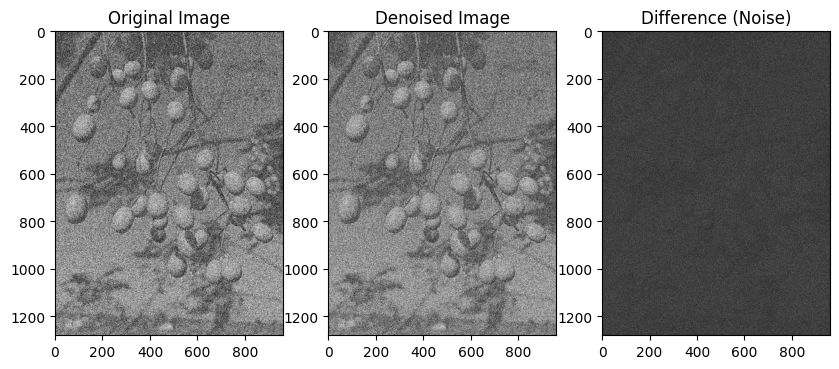

MSE: 0.01
PSNR: 20.68 dB


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from skimage import io, color, metrics
from sklearn.metrics import mean_squared_error

def image_denoising(image_array, wavelet='db4', level=4, mode='soft'):
    # Convert the image to grayscale
    gray_image = color.rgb2gray(image_array)

    # Perform 2D wavelet transform
    coeffs2 = pywt.dwt2(gray_image, wavelet)

    # Set a threshold for denoising
    threshold = 0.1  # Adjust this value based on the noise level in your image

    # Threshold the coefficients
    coeffs2 = tuple(map(lambda x: pywt.threshold(x, threshold, mode=mode), coeffs2))

    # Perform the inverse wavelet transform
    denoised_image = pywt.idwt2(coeffs2, wavelet)

    # Plot the original and denoised images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(denoised_image, cmap='gray')
    plt.title('Denoised Image')
    
    plt.subplot(1, 3, 3)    
    plt.imshow(np.abs(gray_image - denoised_image), cmap='gray')
    plt.title('Difference (Noise)')

    plt.show()

    # Calculate MSE
    mse_value = mean_squared_error(gray_image, denoised_image)
    print(f"MSE: {mse_value:.2f}")

    # Calculate PSNR
    psnr_value = metrics.peak_signal_noise_ratio(gray_image, denoised_image)
    print(f"PSNR: {psnr_value:.2f} dB")

# Example usage with an image array
image_path = 'photography_new_club_gaussian_noise.jpg'
original_image = io.imread(image_path)
image_denoising(original_image, wavelet='db4', level=4, mode='soft')


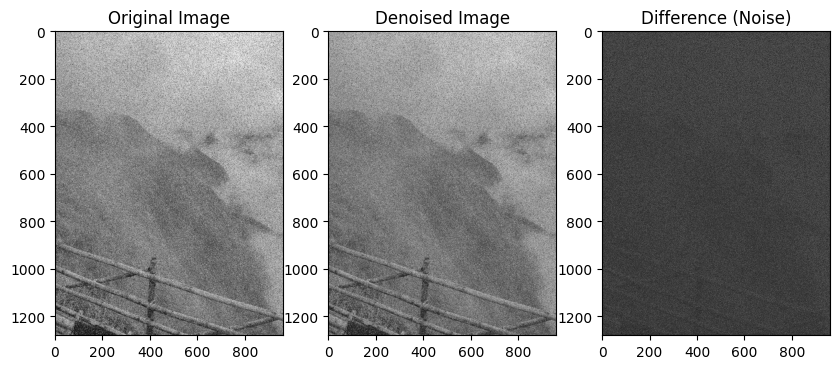

MSE: 0.01
PSNR: 21.02 dB


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from skimage import io, color, metrics
from sklearn.metrics import mean_squared_error

def image_denoising(image_array, wavelet='db4', level=4, mode='soft'):
    # Convert the image to grayscale
    gray_image = color.rgb2gray(image_array)

    # Perform 2D wavelet transform
    coeffs2 = pywt.dwt2(gray_image, wavelet)

    # Set a threshold for denoising
    threshold = 0.1  # Adjust this value based on the noise level in your image

    # Threshold the coefficients
    coeffs2 = tuple(map(lambda x: pywt.threshold(x, threshold, mode=mode), coeffs2))

    # Perform the inverse wavelet transform
    denoised_image = pywt.idwt2(coeffs2, wavelet)

    # Plot the original and denoised images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(denoised_image, cmap='gray')
    plt.title('Denoised Image')
    
    plt.subplot(1, 3, 3)    
    plt.imshow(np.abs(gray_image - denoised_image), cmap='gray')
    plt.title('Difference (Noise)')

    plt.show()

    # Calculate MSE
    mse_value = mean_squared_error(gray_image, denoised_image)
    print(f"MSE: {mse_value:.2f}")

    # Calculate PSNR
    psnr_value = metrics.peak_signal_noise_ratio(gray_image, denoised_image)
    print(f"PSNR: {psnr_value:.2f} dB")

# Example usage with an image array
image_path = 'photography_new_club_salt_pepper_noise.jpg'
original_image = io.imread(image_path)
image_denoising(original_image, wavelet='db4', level=4, mode='soft')


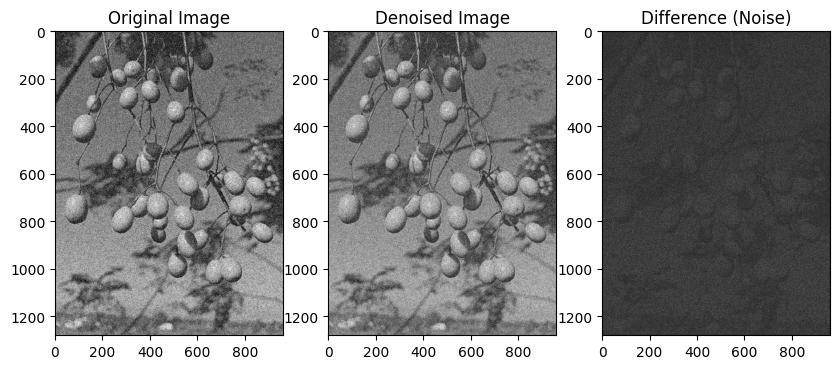

MSE: 0.01
PSNR: 21.04 dB


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from skimage import io, color, metrics
from sklearn.metrics import mean_squared_error

def image_denoising(image_array, wavelet='db4', level=3, mode='soft'):
    # Convert the image to grayscale
    gray_image = color.rgb2gray(image_array)

    # Perform 2D wavelet transform
    coeffs2 = pywt.dwt2(gray_image, wavelet)

    # Set a threshold for denoising
    threshold = 0.1  # Adjust this value based on the noise level in your image

    # Threshold the coefficients
    coeffs2 = tuple(map(lambda x: pywt.threshold(x, threshold, mode=mode), coeffs2))

    # Perform the inverse wavelet transform
    denoised_image = pywt.idwt2(coeffs2, wavelet)

    # Plot the original and denoised images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(denoised_image, cmap='gray')
    plt.title('Denoised Image')
    
    plt.subplot(1, 3, 3)    
    plt.imshow(np.abs(gray_image - denoised_image), cmap='gray')
    plt.title('Difference (Noise)')

    plt.show()

    # Calculate MSE
    mse_value = mean_squared_error(gray_image, denoised_image)
    print(f"MSE: {mse_value:.2f}")

    # Calculate PSNR
    psnr_value = metrics.peak_signal_noise_ratio(gray_image, denoised_image)
    print(f"PSNR: {psnr_value:.2f} dB")

# Example usage with an image array
image_path = 'photography_last_new_club_salt_pepper_noise.jpg'
original_image = io.imread(image_path)
image_denoising(original_image, wavelet='db4', level=4, mode='soft')


In [ ]:
|